<h1> Sentiment Analysis

In [3]:
#!pip install wordcloud
#!pip install textblob


In [5]:
import pandas as pd
from textblob import TextBlob
from wordcloud import WordCloud
import matplotlib.pyplot as plt

In [6]:
# Load the reviews data (replace 'reviews.csv' with your actual data file)
df_reviews = pd.read_csv('reviews.csv')
df_reviews.head()

,listing_id,id,date,reviewer_id,reviewer_name,comments
0,5456,865,2009-03-08,5267,Ellen,Sylvia is a hostess who is gracious and helpfu...
1,5456,977,2009-03-19,8102,Phil,Highly recommended. Sylvia was extremely helpf...
2,5456,1039,2009-03-22,8241,Galen,A great place to stay in a great city. Sylvia ...
3,5456,1347,2009-04-08,11152,April,Highly recommended! \r<br/>Cute and cozy guest...
4,5456,1491,2009-04-13,12400,Ivonne,"What a great little apartment! It was clean, ..."


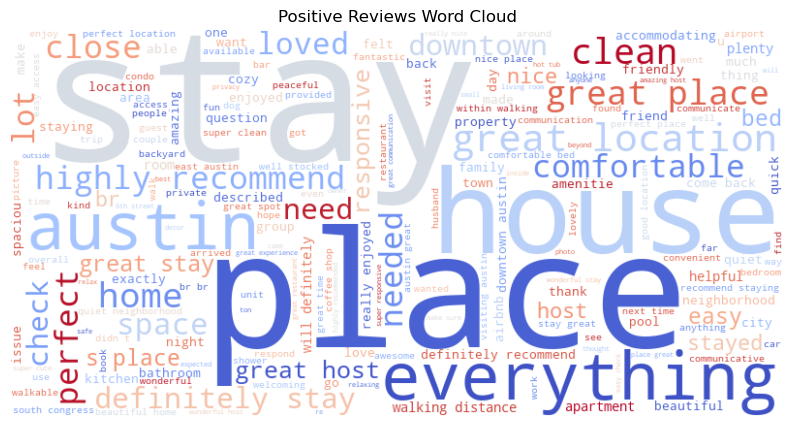

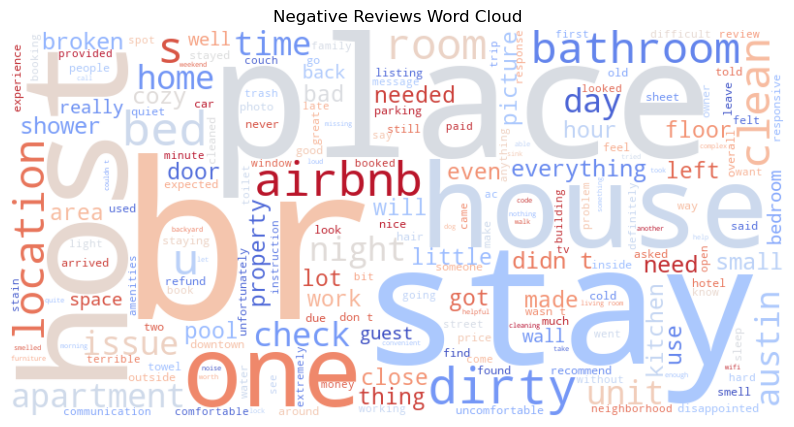

In [8]:

# Preprocess text: fill missing comments, lowercase, and remove any non-relevant characters
df_reviews['comments'] = df_reviews['comments'].fillna('').str.lower()

# Function to determine sentiment polarity
def get_sentiment(text):
    return TextBlob(text).sentiment.polarity

# Apply sentiment analysis
df_reviews['sentiment'] = df_reviews['comments'].apply(get_sentiment)

# Separate positive and negative reviews
positive_reviews = " ".join(df_reviews[df_reviews['sentiment'] > 0]['comments'])
negative_reviews = " ".join(df_reviews[df_reviews['sentiment'] < 0]['comments'])

# Generate Word Clouds
def plot_wordcloud(text, title):
    wordcloud = WordCloud(width=800, height=400, background_color='white', 
                          max_words=200, colormap='coolwarm').generate(text)
    plt.figure(figsize=(10, 6))
    plt.imshow(wordcloud, interpolation='bilinear')
    plt.axis('off')
    plt.title(title)
    plt.show()

# Plot word clouds for positive and negative reviews
plot_wordcloud(positive_reviews, "Positive Reviews Word Cloud")
plot_wordcloud(negative_reviews, "Negative Reviews Word Cloud")


In [9]:
df_listings = pd.read_csv('listings.csv')
df_listings.head()

,id,listing_url,scrape_id,last_scraped,source,name,description,neighborhood_overview,picture_url,host_id,...,review_scores_communication,review_scores_location,review_scores_value,license,instant_bookable,calculated_host_listings_count,calculated_host_listings_count_entire_homes,calculated_host_listings_count_private_rooms,calculated_host_listings_count_shared_rooms,reviews_per_month
0,5456,https://www.airbnb.com/rooms/5456,20240913025540,2024-09-13,city scrape,"Walk to 6th, Rainey St and Convention Ctr",Great central location for walking to Convent...,My neighborhood is ideally located if you want...,https://a0.muscache.com/pictures/14084884/b5a3...,8028,...,4.82,4.73,4.79,NaN,f,1,1,0,0,3.65
1,5769,https://www.airbnb.com/rooms/5769,20240913025540,2024-09-13,previous scrape,NW Austin Room,NaN,Quiet neighborhood with lots of trees and good...,https://a0.muscache.com/pictures/23822033/ac94...,8186,...,4.94,4.77,4.92,NaN,f,1,0,1,0,1.70
2,6413,https://www.airbnb.com/rooms/6413,20240913025540,2024-09-13,previous scrape,Gem of a Studio near Downtown,"Great studio apartment, perfect a single perso...",Travis Heights is one of the oldest neighborho...,https://a0.muscache.com/pictures/miso/Hosting-...,13879,...,4.98,4.87,4.93,NaN,f,1,1,0,0,0.67
3,6448,https://www.airbnb.com/rooms/6448,20240913025540,2024-09-13,city scrape,"Secluded Studio @ Zilker - King Bed, Bright & ...","Clean, private space with everything you need ...",The neighborhood is fun and funky (but quiet)!...,https://a0.muscache.com/pictures/airflow/Hosti...,14156,...,4.98,4.97,4.88,NaN,t,1,1,0,0,2.05
4,8502,https://www.airbnb.com/rooms/8502,20240913025540,2024-09-13,city scrape,Woodland Studio Lodging,Studio rental on lower level of home located i...,NaN,https://a0.muscache.com/pictures/miso/Hosting-...,25298,...,4.88,4.68,4.62,NaN,f,1,1,0,0,0.30


In [11]:

# Preprocess text: fill missing comments, lowercase, and remove any non-relevant characters
df_reviews['comments'] = df_reviews['comments'].fillna('').str.lower()

# Function to classify sentiment
def classify_sentiment(text):
    polarity = TextBlob(text).sentiment.polarity
    if polarity > 0:
        return 'positive'
    elif polarity < 0:
        return 'negative'
    else:
        return 'neutral'

# Apply the sentiment classification to the comments column
df_reviews['sentiment'] = df_reviews['comments'].apply(classify_sentiment)

In [12]:
# Group by listing_id and sentiment to count each type of sentiment per listing
sentiment_summary = df_reviews.groupby(['listing_id', 'sentiment']).size().unstack(fill_value=0)

# Rename columns for readability
sentiment_summary.columns = ['negative_reviews', 'neutral_reviews', 'positive_reviews']

# Reset index to join with df_listings later
sentiment_summary.reset_index(inplace=True)


In [23]:
sentiment_summary.head()

,listing_id,negative_reviews,neutral_reviews,positive_reviews
0,5456,4,5,680
1,5769,3,2,294
2,6413,0,0,121
3,6448,0,2,323
4,8502,1,2,50


In [22]:
# Merge sentiment summary with listings data
df_sentiment_analysis = df_listings.merge(sentiment_summary, left_on='id', right_on='listing_id', how='left')

# Fill any NaN values in the summary columns with 0
df_sentiment_analysis[['negative_reviews', 'neutral_reviews', 'positive_reviews']] = df_sentiment_analysis[['negative_reviews', 'neutral_reviews', 'positive_reviews']].fillna(0)


In [21]:
# Display the top listings based on positive reviews
top_positive_listings = df_sentiment_analysis.sort_values(by='positive_reviews', ascending=False).head(10)
print("Top Listings with Positive Reviews:\n")
top_positive_listings[['id', 'name', 'positive_reviews']]

Top Listings with Positive Reviews:



,id,name,positive_reviews
313,1462311,The Austin Texas House South Congress Stay and...,1220.0
287,949922,"Vintage Airstream in East Austin, Texas",1187.0
591,2528473,Garden Cottage in East Austin,1096.0
819,4974255,Tiny House in the Heart of the East Side,1054.0
5352,44334720,"Kasa | 1BD, Walk to South Congress Bridge | Au...",1046.0
14,57187,"Zilker's Peaceful Haven-Fun, Funky, and Colorful",1036.0
80,202187,South Congress Apartment,1030.0
1838,12308357,Enjoy Waterfall Pool at Luxury SOCO Getaway,975.0
214,705858,Walk to SOCO from Your Retreat with Waterfall ...,958.0
873,5094445,Take a Dip in Waterfall Pool at Lux SoCo Retreat,953.0


In [20]:
# Display the top listings based on negative reviews
top_negative_listings = df_sentiment_analysis.sort_values(by='negative_reviews', ascending=False).head(10)
print("\nTop Listings with Negative Reviews:\n")
top_negative_listings[['id', 'name', 'negative_reviews']]


Top Listings with Negative Reviews:



,id,name,negative_reviews
5352,44334720,"Kasa | 1BD, Walk to South Congress Bridge | Au...",26.0
5351,44334709,"Kasa | City 1BD, Walk to ACL Live | 2nd Street",19.0
103,240541,Stay in the Birdhouse! East/Downtow,18.0
2579,19205496,Hyde Park Studio Apt + King Bed and Free Parking,18.0
2184,16633368,Backyard Tiny House only 15 minutes from downtown,17.0
4361,34807046,Hip Designer Loft | Walk to 6th Street & Rainey,16.0
1523,10576483,Cozy Landing Pad,15.0
1033,5873238,Hyde Park Casita,14.0
2972,22084054,Fully private & economical East Austin studio ...,14.0
596,4050950,"Eastside Oasis - Near Train, UT, DT",13.0


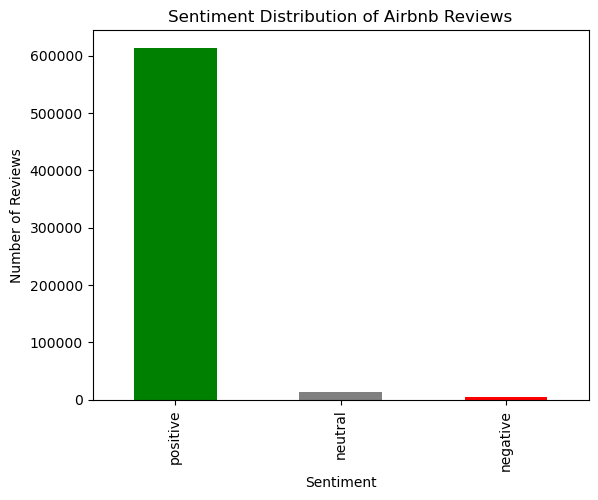

In [14]:
import matplotlib.pyplot as plt

# Plot the distribution of review sentiments
sentiment_counts = df_reviews['sentiment'].value_counts()
sentiment_counts.plot(kind='bar', color=['green', 'gray', 'red'])
plt.title("Sentiment Distribution of Airbnb Reviews")
plt.xlabel("Sentiment")
plt.ylabel("Number of Reviews")
plt.show()
